In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

2023-08-26 17:02:33.370195: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-26 17:02:33.398844: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 17:02:33.621619: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 17:02:33.624039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 17:02:34.696729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

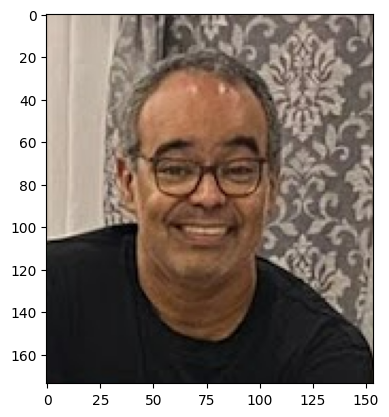

In [3]:
img = image.load_img('images-experiment1/train/hamilton/Screenshot_8.png')
plt.imshow(img)

In [4]:
cv2.imread('images-experiment1/train/hamilton/Screenshot_8.png').shape

(174, 154, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('images-experiment1/train/', 
                                          target_size=(200,200), 
                                          batch_size=3, 
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('images-experiment1/train/', 
                                          target_size=(200,200), 
                                          batch_size=3, 
                                          class_mode = 'binary')

Found 9 images belonging to 1 classes.
Found 9 images belonging to 1 classes.


In [7]:
train_dataset.class_indices

{'hamilton': 0}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
model = tf.keras.models.Sequential( [ 
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape= (200,200,3)), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

2023-08-26 17:02:36.738574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 17:02:36.739254: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics=['accuracy'])

In [11]:
model_fit = model.fit( train_dataset, 
                      steps_per_epoch = 3, 
                      epochs = 10, 
                      validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 1s 240ms/step - loss: 0.2480 - accuracy: 0.6667 - val_loss: 4.6217e-12 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 157ms/step - loss: 4.6217e-12 - accuracy: 1.0000 - val_loss: 4.6217e-12 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 153ms/step - loss: 4.6217e-12 - accuracy: 1.0000 - val_loss: 4.6217e-12 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 152ms/step - loss: 4.6217e-12 - accuracy: 1.0000 - val_loss: 4.6217e-12 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 138ms/step - loss: 4.6217e-12 - accuracy: 1.0000 - val_loss: 4.6217e-12 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 164ms/step - loss: 4.6217e-12 - accuracy: 1.0000 - val_loss: 4.6217e-12 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 140ms/step - loss: 4.6217e-12 - accuracy: 1.0000 - val_loss: 4.